In [202]:
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import nltk
import geopandas as gpd

#nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

In [18]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('iphone  since:2019-07-05 until:2023-01-09').get_items()):
    if i>20000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel,tweet.user.location, tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet","Location", "Tweet"])

In [13]:
tweets_df

,User,Date Created,Number of Likes,Source of Tweet,Location,Tweet
0,taldagehmatos,2023-01-08 23:59:57+00:00,0,Twitter for iPhone,"Rio de Janeiro, Brasil",a camera do iphone 8 ta uma porra irmão
1,bunkeidemo,2023-01-08 23:59:52+00:00,4,Twitter for iPhone,否定不可！堂々と “欲” ‼︎,iPhoneのこの機能はじめて知った。\n\n#新しいプロフィール画像 https://t....
2,DerikMalcolm,2023-01-08 23:59:49+00:00,0,Twitter for iPhone,"Lockport, NY",Should be getting an iPhone 7 in the next coup...
3,k_n____aiko,2023-01-08 23:59:48+00:00,4,Twitter for iPhone,aiko、酒、服、時々アニメ,旦那が私のスピーカーで音楽聴いてるからBluetoothテロしてaikoを流すという邪魔をし...
4,marce_ron4,2023-01-08 23:59:46+00:00,0,Twitter for iPhone,,@tokumewi 失礼致します！\niPhoneはもう売ってしまいましたか？
...,...,...,...,...,...,...
19996,ano_ne_u_,2023-01-08 13:52:43+00:00,1,Twitter for iPhone,i:🏯様,@naruse_tsubomi iPhoneのカメラ！
19997,adelxzani,2023-01-08 13:52:41+00:00,9,Twitter for iPhone,she/they,@paarxnoica l'ultimo iphone
19998,syk_srym,2023-01-08 13:52:40+00:00,2,Twitter for iPhone,白山市⇄神戸市⇄東京,@tetti69 私も新しいiPhoneにしたいです🤭
19999,mikawa_bba,2023-01-08 13:52:36+00:00,4,Twitter for iPhone,,オンラインで注文した機種変のiPhone、1日で届いた🙌🏻\nでもね、初めてデータ移行やって...


In [22]:
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())
# function for preprocessing tweet in preparation for sentiment analysis
def ProcessedTweets(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
tweets_df['Processed_Tweets'] = tweets_df['Tweet'].apply(ProcessedTweets)
tweets_df.head(5)

,User,Date Created,Number of Likes,Source of Tweet,Location,Tweet,Processed_Tweets
0,taldagehmatos,2023-01-08 23:59:57+00:00,0,Twitter for iPhone,"Rio de Janeiro, Brasil",a camera do iphone 8 ta uma porra irmão,camera iphone ta uma porra irmão
1,bunkeidemo,2023-01-08 23:59:52+00:00,4,Twitter for iPhone,否定不可！堂々と “欲” ‼︎,iPhoneのこの機能はじめて知った。\n\n#新しいプロフィール画像 https://t....,iphoneのこの機能はじめて知った。
2,DerikMalcolm,2023-01-08 23:59:49+00:00,0,Twitter for iPhone,"Lockport, NY",Should be getting an iPhone 7 in the next coup...,getting iphone next couple day use development
3,k_n____aiko,2023-01-08 23:59:48+00:00,4,Twitter for iPhone,aiko、酒、服、時々アニメ,旦那が私のスピーカーで音楽聴いてるからBluetoothテロしてaikoを流すという邪魔をし...,旦那が私のスピーカーで音楽聴いてるからbluetoothテロしてaikoを流すという邪魔をし...
4,marce_ron4,2023-01-08 23:59:46+00:00,0,Twitter for iPhone,,@tokumewi 失礼致します！\niPhoneはもう売ってしまいましたか？,失礼致します！ iphoneはもう売ってしまいましたか？


In [26]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [27]:
# using the functions to get the polarity and sentiment
tweets_df['Polarity'] = tweets_df['Processed_Tweets'].apply(polarity)
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentimenttextblob)
sent = tweets_df['Sentiment'].value_counts()
sent

Neutral     16039
Positive     2926
Negative     1036
Name: Sentiment, dtype: int64

In [30]:
tweets_df['Processed_location'] = tweets_df['Location'].apply(ProcessedTweets)

In [49]:
t_df=tweets_df[tweets_df['Processed_location']!='']
pos=t_df[t_df["Polarity"]>0]
neg=t_df[t_df["Polarity"]<0]

In [50]:
# Import the required library
from geopy.geocoders import Nominatim
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
latde=[]
longde=[]
for i in t_df['Processed_location']:
    try:
        location = geolocator.geocode(i)
        try:
            latde.append(location.latitude)
            longde.append(location.longitude)
            
        except:
            a=1
    except:
        a=1

In [52]:
plty = pd.DataFrame(
    {'Longitudes': longde,
     'Latitudes': latde,
    })

In [148]:
import plotly.express as px
fig = px.scatter_geo(plty, lon='Longitudes', lat='Latitudes')
fig.update_layout(title_text='Distribution of tweets across the Globe')
fig.show()

In [185]:
# Import the required library
from geopy.geocoders import Nominatim
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
#print (tdf['Location'])
latp=[]
longp=[]
for i in pos['Processed_location']:
    try:
        location = geolocator.geocode(i)
        try:
            latp.append(location.latitude)
            longp.append(location.longitude)
            
        except:
            a=1
    except:
        a=1

In [186]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

latn=[]
longn=[]

for i in neg['Processed_location']:
    try:
        location = geolocator.geocode(i)
        try:
            latn.append(location.latitude)
            
            longn.append(location.longitude)
           
        except:
            a=1
    except:
        a=1

In [226]:
pltyp = pd.DataFrame(
    {'Longitudes': longp,
     'Latitudes': latp})

pltyn = pd.DataFrame(
    {'Longitudes': longn,
     'Latitudes': latn
    })


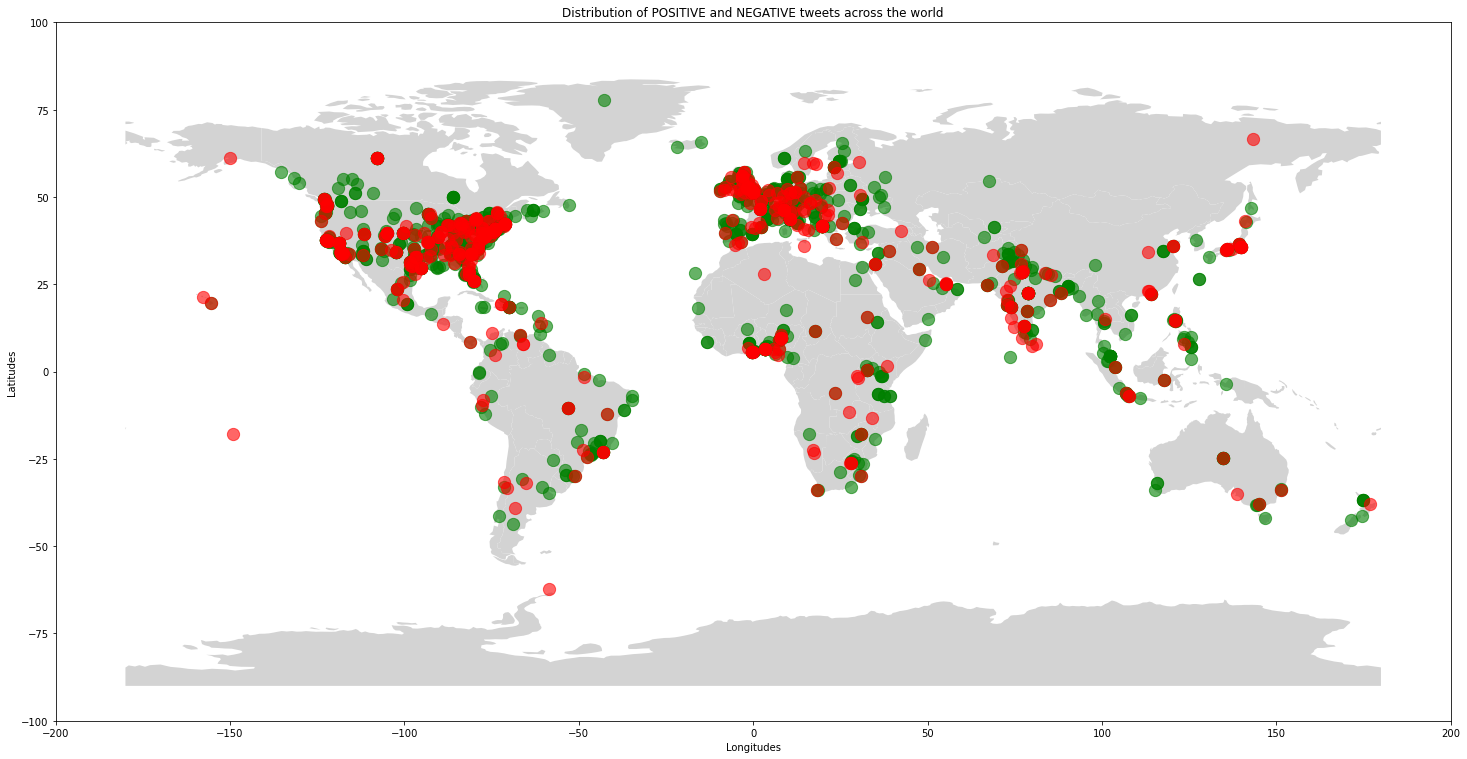

In [188]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(25, 15))
worldmap.plot(color="lightgray", ax=ax)

# Plotting our Impact Energy data with a color map
xp = pltyp['Longitudes']
yp = pltyp['Latitudes']

xn = pltyn['Longitudes']
yn = pltyn['Latitudes']


plt.scatter(xp, yp,s=150,c='green', alpha=0.6, vmin=0, vmax=20,
            cmap='cool')
plt.scatter(xn, yn,s=150, c='red',alpha=0.6, vmin=0, vmax=20,
            cmap='autumn')

# Creating axis limits and title
plt.xlim([-200,200])
plt.ylim([-100,100])

plt.title("Distribution of POSITIVE and NEGATIVE tweets across the world")
plt.rcParams.update({'font.size': 22})

plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.show()

In [86]:
df=tweets_df

In [87]:
df["date"]=pd.to_datetime(df["Date Created"])

In [88]:
df.set_index('date', inplace=True)

In [89]:
sent = df['Sentiment'].value_counts()
sent

Neutral     16039
Positive     2926
Negative     1036
Name: Sentiment, dtype: int64

In [90]:
df3=pd.DataFrame(sent)

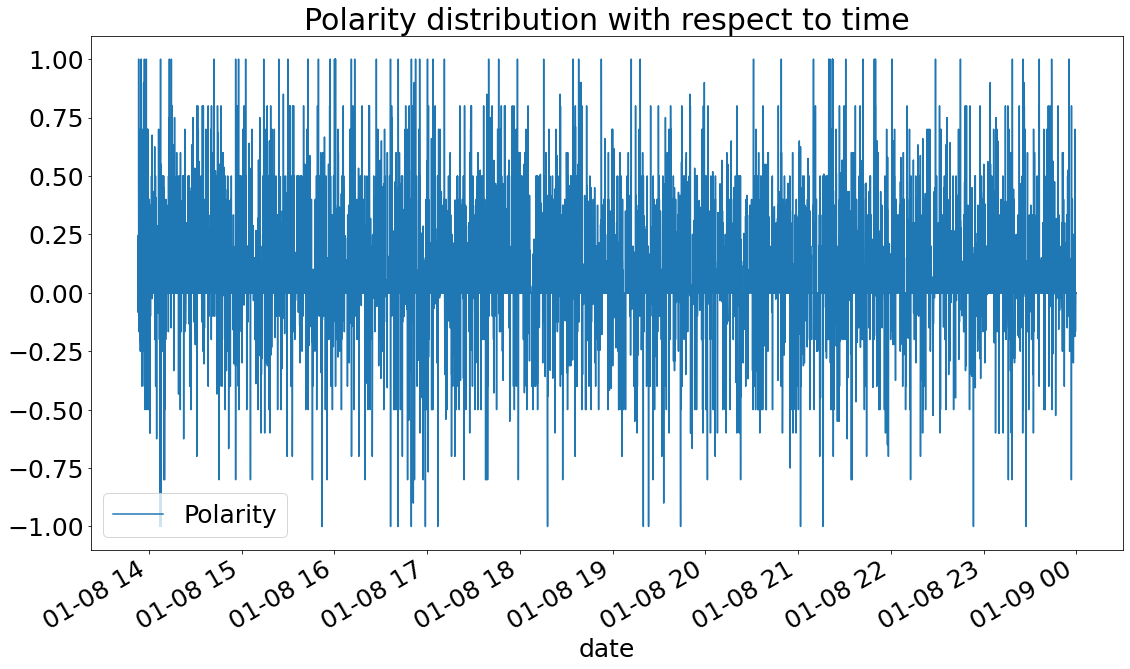

In [225]:
ax=df.plot(y="Polarity")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title("Polarity distribution with respect to time")
plt.rcParams.update({'font.size': 25})

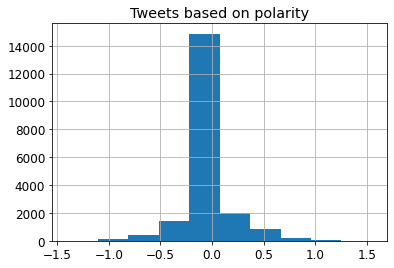

In [220]:
df["Polarity"].diff().hist();

plt.title("Tweets based on polarity")
plt.rcParams.update({'font.size': 8})


In [218]:
i=df[df["Source of Tweet"]=="Twitter for iPhone"]
senti = i['Sentiment'].value_counts()

In [95]:
a=df[df["Source of Tweet"]=="Twitter for Android"]
senta = a['Sentiment'].value_counts()

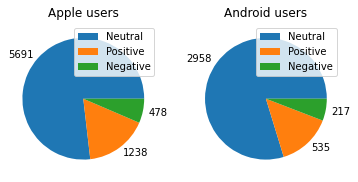

In [183]:
plt.subplot(1, 2, 1,)
patches,text=plt.pie(senti,labels=senti)
plt.legend(patches, ["Neutral","Positive","Negative"], loc="best")
#"Total No of apple users  and the polarity of their tweets"
plt.title("Apple users")
ax.annotate('Footnote added below the chart with a smaller font',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
plt.subplot(1, 2, 2)
patches,text=plt.pie(senta,labels=senta)
plt.legend(patches, ["Neutral","Positive","Negative"], loc="best")
plt.title("Android users")
plt.rcParams.update({'font.size': 10})
#"Total No of android users and the polarity of their tweets"



In [103]:
o=senta[0]+senta[1]+senta[2]
print("The chance of getting a new customer: ",int(senta[1]/o*100),"%")
p=senti[0]+senti[1]+senti[2]
print("The chance of getting a new customer: ",int(senti[2]/p*100),"%")

The chance of getting a new customer:  14 %
The chance of getting a new customer:  6 %
